In [1]:
## 获取数据
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['SimHei']  # win
# plt.rcParams["font.family"] = 'Arial Unicode MS'  # mac
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号

data = pd.read_table('julei.txt', sep='\t', engine="python", encoding='utf-8')
data.columns.values
data.head()

,age,c210apvt,c210b200,c210blu,c210bpvt,c210cip,c210ebi,c210hmi,c210hva,c210kses,...,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
0,67,99,11,10,1,74,71,90,738,111,...,52,65,71,22,79,15,64,42,8,8
1,76,98,6,15,2,69,69,84,494,97,...,44,81,99,37,65,17,61,46,6,3
2,67,88,7,26,12,32,44,50,516,83,...,38,44,62,44,47,20,61,46,7,3
3,71,96,5,15,4,82,82,103,473,105,...,45,71,99,39,71,4,62,37,8,9
4,75,88,7,9,12,38,47,55,523,89,...,32,13,36,15,65,9,62,37,4,3


In [2]:
data.shape # 查看数据量

(43666, 24)

In [3]:
data.info() # 查看数据的信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43666 entries, 0 to 43665
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       43666 non-null  int64
 1   c210apvt  43666 non-null  int64
 2   c210b200  43666 non-null  int64
 3   c210blu   43666 non-null  int64
 4   c210bpvt  43666 non-null  int64
 5   c210cip   43666 non-null  int64
 6   c210ebi   43666 non-null  int64
 7   c210hmi   43666 non-null  int64
 8   c210hva   43666 non-null  int64
 9   c210kses  43666 non-null  int64
 10  c210mah   43666 non-null  int64
 11  c210mob   43666 non-null  int64
 12  c210mys   43666 non-null  int64
 13  c210pdv   43666 non-null  int64
 14  c210pmr   43666 non-null  int64
 15  c210poo   43666 non-null  int64
 16  c210psu   43666 non-null  int64
 17  c210pwc   43666 non-null  int64
 18  c210wht   43666 non-null  int64
 19  ilor      43666 non-null  int64
 20  meda      43666 non-null  int64
 21  pdpe      43666 non-null  int64
 22

In [4]:
#查看缺失值
na_num = pd.isna(data).sum()
print(na_num)

# 均值、中位数、众数
# 缺失值处理 -- 每列特征的均值填充缺失数据
#data2 = data.fillna(data.mean())
### 用每列特征的中位数填充缺失数据
#data.fillna(data.median())
#用相邻后面（back）特征填充前面空值，前一个则是ffill
#data.fillna(method='bfill')   

age         0
c210apvt    0
c210b200    0
c210blu     0
c210bpvt    0
c210cip     0
c210ebi     0
c210hmi     0
c210hva     0
c210kses    0
c210mah     0
c210mob     0
c210mys     0
c210pdv     0
c210pmr     0
c210poo     0
c210psu     0
c210pwc     0
c210wht     0
ilor        0
meda        0
pdpe        0
tins        0
zhip19      0
dtype: int64


In [5]:
# 若存在将缺失值所在的行去除的情况，记得恢复索引
# 缺失值处理之后，索引恢复
for i in [data]:
    i.index = range(i.shape[0])
data.head()

,age,c210apvt,c210b200,c210blu,c210bpvt,c210cip,c210ebi,c210hmi,c210hva,c210kses,...,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
0,67,99,11,10,1,74,71,90,738,111,...,52,65,71,22,79,15,64,42,8,8
1,76,98,6,15,2,69,69,84,494,97,...,44,81,99,37,65,17,61,46,6,3
2,67,88,7,26,12,32,44,50,516,83,...,38,44,62,44,47,20,61,46,7,3
3,71,96,5,15,4,82,82,103,473,105,...,45,71,99,39,71,4,62,37,8,9
4,75,88,7,9,12,38,47,55,523,89,...,32,13,36,15,65,9,62,37,4,3


 标准化计算方式：(x-平均值)/方差，得到均值为0，标准差为1的分布，
  标准化之后的内容是数组型，需要转化为数据框 
  
  归一化：Xi = (Xi - min(Xi))  /  ( max(Xi) - min(Xi) )

In [6]:
# 标准化方法1：通过手动计算进行标准化
x = (data -data.mean())/data.std()
print(x.mean(),x.std())

age        -3.210458e-16
c210apvt    1.428786e-15
c210b200    4.743288e-16
c210blu     8.557662e-17
c210bpvt   -2.325844e-15
c210cip    -3.971820e-17
c210ebi     7.898332e-16
c210hmi    -7.636247e-17
c210hva     1.101678e-15
c210kses   -2.743801e-16
c210mah    -1.605113e-16
c210mob     1.490393e-14
c210mys    -2.702521e-15
c210pdv     1.162853e-16
c210pmr     1.358832e-16
c210poo     7.995075e-16
c210psu     8.397028e-15
c210pwc    -1.984796e-15
c210wht     3.804547e-16
ilor       -9.281982e-15
meda       -1.841746e-14
pdpe        1.842098e-14
tins        1.087992e-14
zhip19      1.957512e-15
dtype: float64 age         1.0
c210apvt    1.0
c210b200    1.0
c210blu     1.0
c210bpvt    1.0
c210cip     1.0
c210ebi     1.0
c210hmi     1.0
c210hva     1.0
c210kses    1.0
c210mah     1.0
c210mob     1.0
c210mys     1.0
c210pdv     1.0
c210pmr     1.0
c210poo     1.0
c210psu     1.0
c210pwc     1.0
c210wht     1.0
ilor        1.0
meda        1.0
pdpe        1.0
tins        1.0
zhip19      1.0
d

In [7]:
# x.head() 
# meta data
# # 元数据 原数据 源数据

In [8]:
#标准化方法2：通过preprocessing进行标准化，需要重新给列名
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(data)
data_s = pd.DataFrame(scaler.fit_transform(data,y=data.columns)) 
data_s.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.978589,0.914099,-0.240272,-0.943023,-0.939652,0.698814,0.666411,0.667379,1.755638,1.117085,...,0.560585,0.191037,0.096746,-0.943282,1.140221,-0.157255,0.839670,-1.028041,0.037856,1.162920
1,1.105650,0.824644,-0.557761,-0.441553,-0.846239,0.522708,0.579907,0.482374,0.737257,0.397384,...,-0.020659,0.832651,1.014763,0.310684,0.226456,-0.052947,0.648286,-0.725118,-0.523539,-0.455300
2,-0.978589,-0.069912,-0.494263,0.661683,0.087885,-0.780475,-0.501391,-0.565992,0.829079,-0.322318,...,-0.456591,-0.651081,-0.198331,0.895868,-0.948385,0.103515,0.648286,-0.725118,-0.242842,-0.455300
3,-0.052261,0.645733,-0.621259,-0.441553,-0.659415,0.980584,1.142182,1.068225,0.649610,0.808641,...,0.051997,0.431642,1.014763,0.477879,0.618070,-0.730949,0.712080,-1.406696,0.037856,1.486564
4,0.874068,-0.069912,-0.494263,-1.043318,0.087885,-0.569148,-0.371635,-0.411820,0.858294,-0.013874,...,-0.892524,-1.894207,-1.050775,-1.528466,0.226456,-0.470179,0.712080,-1.406696,-1.084935,-0.455300


In [9]:
# 列名更新方法1：将原列名赋给当前列名 
new_col = data.columns
data_s.columns = new_col
data_s.head()

,age,c210apvt,c210b200,c210blu,c210bpvt,c210cip,c210ebi,c210hmi,c210hva,c210kses,...,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
0,-0.978589,0.914099,-0.240272,-0.943023,-0.939652,0.698814,0.666411,0.667379,1.755638,1.117085,...,0.560585,0.191037,0.096746,-0.943282,1.140221,-0.157255,0.839670,-1.028041,0.037856,1.162920
1,1.105650,0.824644,-0.557761,-0.441553,-0.846239,0.522708,0.579907,0.482374,0.737257,0.397384,...,-0.020659,0.832651,1.014763,0.310684,0.226456,-0.052947,0.648286,-0.725118,-0.523539,-0.455300
2,-0.978589,-0.069912,-0.494263,0.661683,0.087885,-0.780475,-0.501391,-0.565992,0.829079,-0.322318,...,-0.456591,-0.651081,-0.198331,0.895868,-0.948385,0.103515,0.648286,-0.725118,-0.242842,-0.455300
3,-0.052261,0.645733,-0.621259,-0.441553,-0.659415,0.980584,1.142182,1.068225,0.649610,0.808641,...,0.051997,0.431642,1.014763,0.477879,0.618070,-0.730949,0.712080,-1.406696,0.037856,1.486564
4,0.874068,-0.069912,-0.494263,-1.043318,0.087885,-0.569148,-0.371635,-0.411820,0.858294,-0.013874,...,-0.892524,-1.894207,-1.050775,-1.528466,0.226456,-0.470179,0.712080,-1.406696,-1.084935,-0.455300


In [10]:
#列名更新方法2：列名写定
# new_col = [...]
# data_s.columns = new_col
# data_s.head()

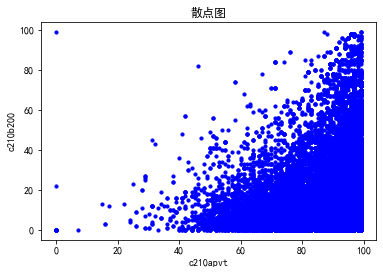

In [11]:
# 查看元数据散点图，判断可以聚类的趋势
import numpy as np
plt.scatter(
    data['c210apvt'],
    data['c210b200'],
    s=10,
    c='b',
)  #s标量 c颜色
plt.xlabel('c210apvt')  #添加x坐标标注
plt.ylabel('c210b200')  #添加y坐标标注
plt.title("散点图")  #添加标题
plt.show()

In [12]:
from sklearn.cluster import KMeans #引入kmeans的函数

最佳K值的确定：

肘部法：选择误差平方和突然变小的K值

轮廓系数：轮廓系数的值是介于[-1,1] ，越趋近于1代表内聚度和分离度都相对较优

 kmeans的误差平方和：在确定簇的过程中，点与中心的平方和

Text(0, 0.5, '$J(C_K)$')

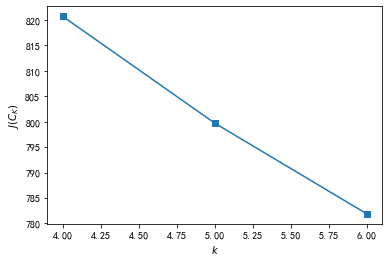

In [13]:
#  确定K值
inertia = []
for k in range(4, 7):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_s)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.plot(range(4, 7), inertia, marker='s')
plt.xlabel('$k$')  # k值，加入$表示输出数学符号
plt.ylabel('$J(C_K)$')  # 误差平方和

In [14]:
#  确定K值
# inertia = []
# for k in range(2,10):
#     kmeans = KMeans(n_clusters = k,random_state = 1).fit(data_s)
#     inertia.append(np.sqrt(kmeans.inertia_)) 
# plt.plot(range(2,10),inertia,marker = 's')
# plt.xlabel('k') #k值
# plt.ylabel('J(C_K)')#误差平方和

In [15]:
# 轮廓系数
from sklearn.metrics import silhouette_score  #引入判断标准，轮廓系数

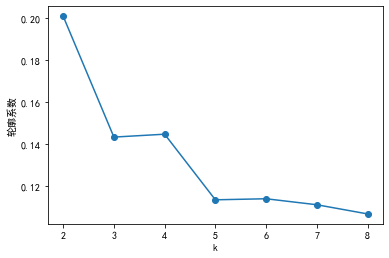

In [16]:
# 存放轮廓系数
Scores = []  
for k in range(2, 9):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(data_s)
    Scores.append(silhouette_score(data_s, estimator.labels_, metric='euclidean'))
X = range(2, 9)
plt.xlabel('k')
plt.ylabel('轮廓系数')

plt.plot(X, Scores, 'o-')
plt.show()

In [17]:
# 建立模型
cluster = KMeans(n_clusters = 3,random_state = 5).fit(data_s)

kmeans模型建立之后的值，模型.labels_可以得到标签值，模型.cluster_centers_可以得到聚类中心

In [18]:
# 聚类中心
centers = cluster.cluster_centers_ # 聚类中心
centers

array([[-0.00637532,  0.37042644,  0.11199368,  0.24152175, -0.37287165,
         0.17263241, -0.07104766, -0.09548597, -0.34307371, -0.20705539,
         0.2052655 ,  0.11530663, -0.22565849, -0.07685801,  0.27672276,
         0.39498255,  0.31804119, -0.08481269, -0.08249044, -0.07299627,
        -0.05832969,  0.17825908,  0.14827617,  0.0421352 ],
       [-0.02824901, -1.13313053, -0.23918986,  0.51200686,  1.15439315,
        -1.17337055, -0.93837785, -0.92022245, -0.34891139, -0.84140693,
        -0.5695721 ,  0.03694859, -0.73722412,  0.76286638, -1.01274814,
        -1.02806664, -0.70856065,  0.20192687, -0.86806127,  0.06143629,
         0.1895416 , -0.2183131 , -0.30204513, -0.25315972],
       [ 0.04456073,  0.67208465,  0.08165994, -1.03203947, -0.69272173,
         1.07170667,  1.22954806,  1.25173875,  1.02122342,  1.35783124,
         0.30385829, -0.24882156,  1.26850904, -0.75978869,  0.69749482,
         0.50484899,  0.26634604, -0.08627651,  1.1672787 ,  0.05781163,
  

In [19]:
# 样本聚类标签
c_preds = cluster.labels_ # 1.直接从建立好的模型中获取lable值，不需要调用接口
c_preds1 = cluster.fit_predict(data_s) #2.使用sklearn建模步骤的predict得到label值
print(c_preds)
print(c_preds1)

[2 0 1 ... 2 1 0]
[2 0 1 ... 2 1 0]


In [20]:
#查看各个类别的数据，是否比较均衡
unique_data = np.unique(c_preds) #查看不同的类别有几个
print(unique_data)
num = str(c_preds.tolist()).count("1") #将数组转化为列表，来进行计数
print( str(c_preds.tolist()).count("0"),str(c_preds.tolist()).count("1"),
      str(c_preds.tolist()).count("2"))

[0 1 2]
19654 12984 11028


In [21]:
c_preds.tolist()

[2,
 0,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 0,
 1,
 2,
 2,
 2,
 0,
 2,
 0,
 1,
 1,
 0,
 1,
 2,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 1,
 0,
 2,
 0,
 0,
 2,
 1,
 1,
 2,
 1,
 2,
 0,
 1,
 2,
 0,
 0,
 1,
 2,
 0,
 2,
 1,
 1,
 1,
 2,
 2,
 0,
 1,
 0,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 0,
 0,
 1,
 2,
 2,
 0,
 2,
 2,
 1,
 1,
 0,
 0,
 1,
 2,
 2,
 0,
 2,
 2,
 2,
 1,
 0,
 1,
 1,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 1,
 1,
 0,
 1,
 0,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 2,
 0,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 0,
 1,
 2,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 1,
 2,
 2,
 0,
 2,
 1,
 0,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 1,
 0,
 0,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 0,
 2,
 1,
 0,
 2,


In [22]:
# 查看总距离平方和 
inertia = cluster.inertia_
np.sqrt(inertia) # 均方误差 

848.8086547604381

In [23]:
# 轮廓系数均值
silhouette_score(data_s,c_preds)  

0.14350859133929433

In [24]:
# 每个样本的轮廓系数
from sklearn.metrics import silhouette_samples
silhouette_samples(data_s, c_preds)

array([ 0.15043155,  0.08795278, -0.01442681, ...,  0.26244616,
       -0.02781409,  0.11320812])

In [25]:
data_s.values[c_preds == 1] # 转化成数组

array([[-0.97858903, -0.06991159, -0.49426344, ..., -0.72511794,
        -0.24284154, -0.45530005],
       [ 0.87406789, -0.06991159, -0.49426344, ..., -1.40669575,
        -1.08493477, -0.45530005],
       [ 0.64248577, -2.48521113, -0.11327576, ..., -0.72511794,
         1.72204267, -0.77894413],
       ...,
       [-1.21017115, -1.85902236, -0.36726755, ..., -0.64938707,
        -1.36563251, -1.42623228],
       [-0.05226057, -1.50120021, -0.24027165, ..., -0.72511794,
        -0.52353928, -1.42623228],
       [ 0.87406789, -0.24882267,  0.14071602, ...,  2.07692416,
        -0.52353928,  0.1919881 ]])

In [26]:
data_s.values[:,0]

array([-0.97858903,  1.10565   , -0.97858903, ..., -1.44175327,
        0.87406789,  1.10565   ])

In [27]:
centers[:,0]  # 第一个维度下的中心

array([-0.00637532, -0.02824901,  0.04456073])

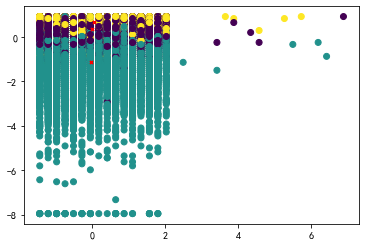

In [28]:
plt.figure()
plt.scatter(data_s.values[:, 0], data_s.values[:, 1], c=c_preds)#原始数据散点图，按照分类查看
plt.scatter(centers[:, 0], centers[:, 1],
            marker='x', s=10, linewidths=3,
            color='r')#重心红色X进行突出

In [29]:
# 将聚类后的值与原数据进行对比
from pandas.core.frame import DataFrame
c_preds = DataFrame(c_preds)
c_preds

,0
0,2
1,0
2,1
3,2
4,1
...,...
43661,0
43662,0
43663,2
43664,1


In [30]:
c_preds.rename(columns={0:'label'},inplace=True)
c_preds

,label
0,2
1,0
2,1
3,2
4,1
...,...
43661,0
43662,0
43663,2
43664,1


In [31]:
data_kmeans = pd.concat([data,c_preds],axis=1 )
data_kmeans.head()

,age,c210apvt,c210b200,c210blu,c210bpvt,c210cip,c210ebi,c210hmi,c210hva,c210kses,...,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19,label
0,67,99,11,10,1,74,71,90,738,111,...,65,71,22,79,15,64,42,8,8,2
1,76,98,6,15,2,69,69,84,494,97,...,81,99,37,65,17,61,46,6,3,0
2,67,88,7,26,12,32,44,50,516,83,...,44,62,44,47,20,61,46,7,3,1
3,71,96,5,15,4,82,82,103,473,105,...,71,99,39,71,4,62,37,8,9,2
4,75,88,7,9,12,38,47,55,523,89,...,13,36,15,65,9,62,37,4,3,1


In [32]:
# 导出为文件
import csv
outputpath='julei.csv'
data_kmeans.to_csv(outputpath,index=True,header=True)

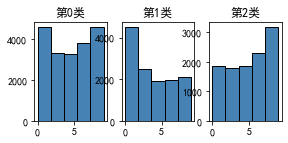

In [33]:
# 绘制子图

fig = plt.figure()
for i in range(3):
    ax = fig.add_subplot(241 + i)
    plt.hist(
        x=data_kmeans[data_kmeans.label == i].zhip19,  # 指定绘图数据
        bins=5,  # 指定直方图中条块的个数
        color='steelblue',  # 指定直方图的填充色
        edgecolor='black'  # 指定直方图的边框色
    )
    ax.set_title('第' + str(i) + '类')
plt.show()

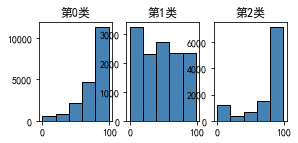

In [34]:
# 绘制子图
fig = plt.figure()
for i in range(3):
    ax = fig.add_subplot(241+i)
    plt.hist(x = data_kmeans[data_kmeans.label==i].c210psu, # 指定绘图数据
             bins = 5, # 指定直方图中条块的个数
             color = 'steelblue', # 指定直方图的填充色
             edgecolor = 'black' # 指定直方图的边框色
            )
    ax.set_title('第'+str(i)+'类')
plt.show()